In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for table-like data and matrices
import numpy as np
import pandas as pd
import scipy.io as sio
import ase.io as aio
#Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

import scipy
import datetime

#modules for learning and post-processing
import os
import subprocess

In [3]:
#Configure Visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
mpl.rcParams[ 'figure.figsize' ] = 16 , 12
mpl.rcParams.update({'font.size': 28})

In [4]:
pd.set_option('display.max_columns', 27)

In [5]:
xl1 = pd.ExcelFile("PLD_list.xlsx")

In [6]:
xl1.sheet_names

['zep_pp',
 'zeo_pp_issues',
 'haldoupis',
 'zeo_hal',
 'apaar',
 'zeo_apaar',
 'zeo_apaar_balance',
 'sign_distance',
 'zep_apaar_sd',
 'Sheet10']

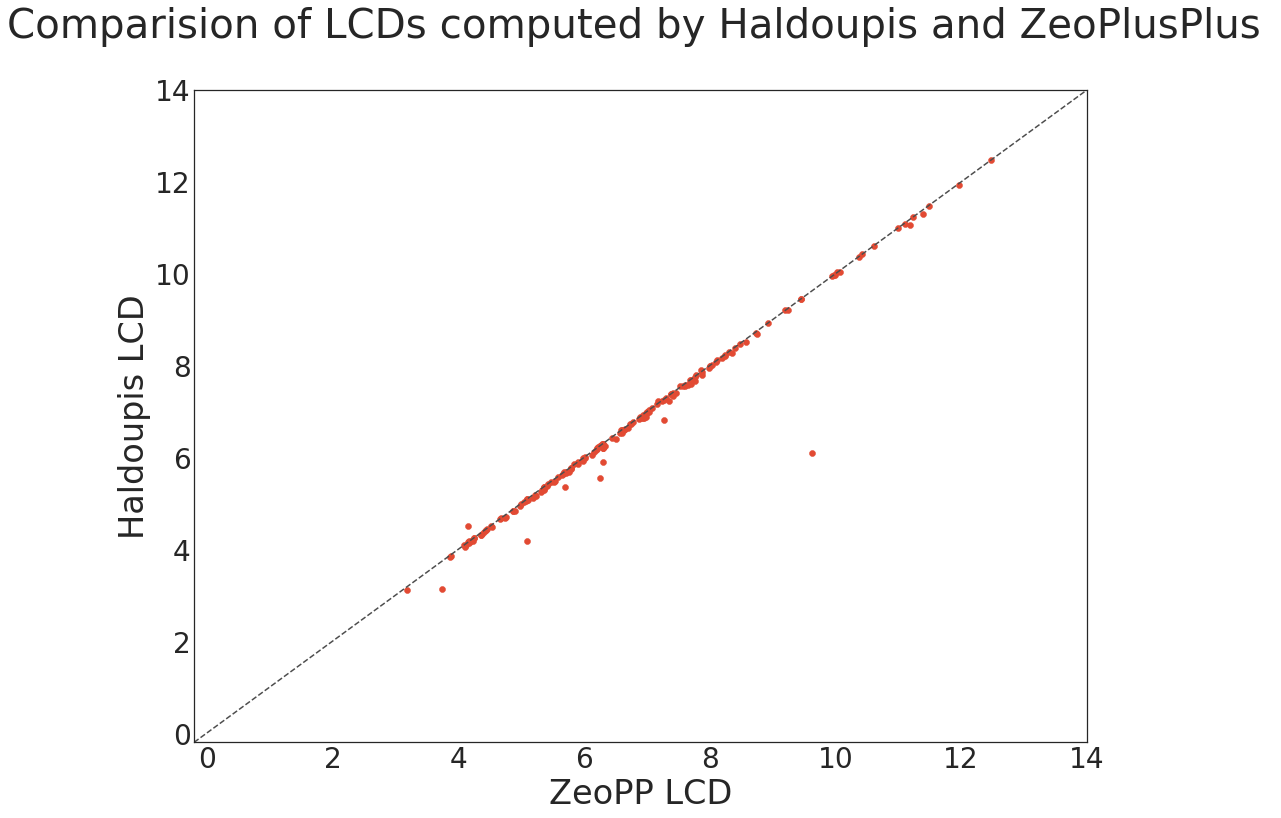

In [7]:
df1 = pd.read_excel(xl1, xl1.sheet_names[3])

l1 = np.array(df1["Di"])
l2 = np.array(df1["LCD_h"])

plt.scatter(l1, l2)
plt.title("Comparision of LCDs computed by Haldoupis and ZeoPlusPlus \n")
plt.xlabel("ZeoPP LCD")
plt.ylabel("Haldoupis LCD")
plt.xlim([-0.2, 14.0])
plt.ylim([-0.2, 14.0])
plt.plot([-0.2, 14.0], [-0.2, 14.0], ls="--", c=".3")
plt.show()

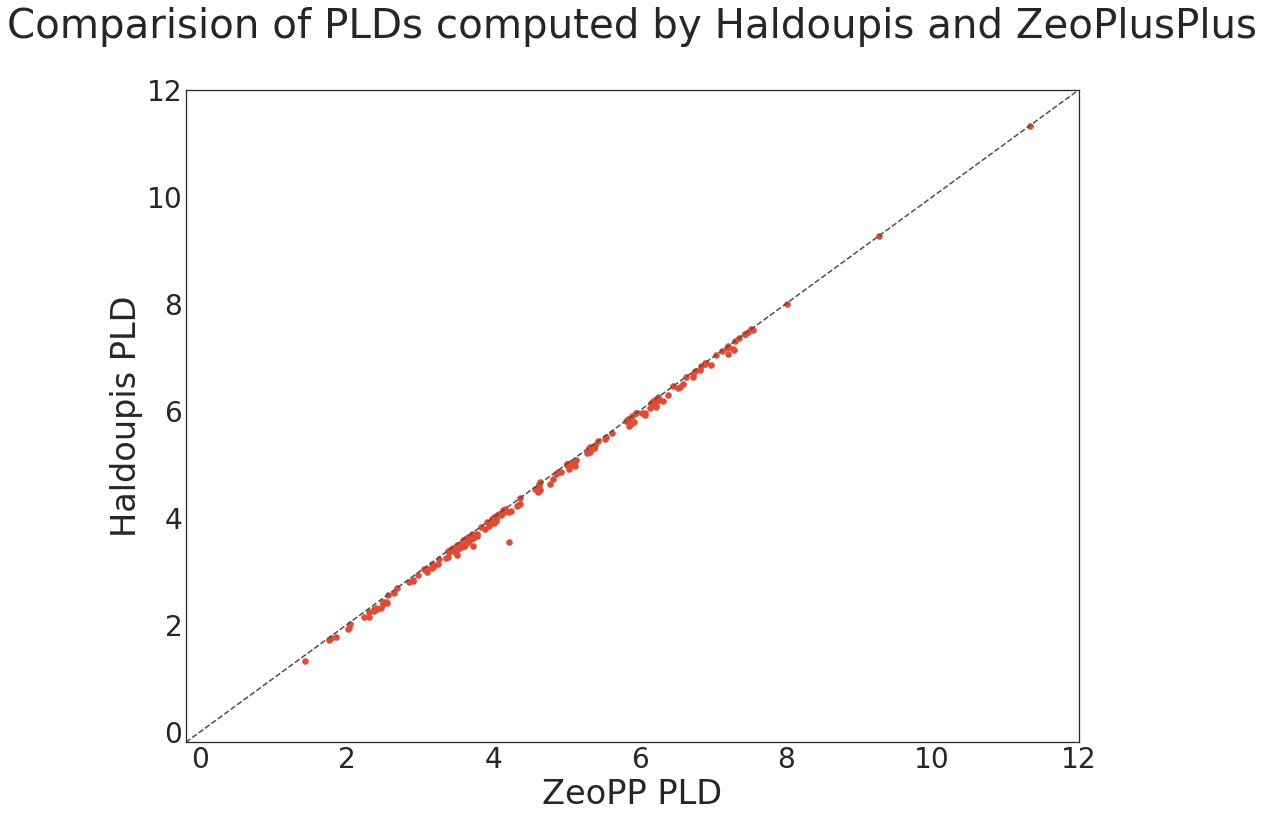

In [9]:
df1 = pd.read_excel(xl1, xl1.sheet_names[3])

l1 = np.array(df1["df"])
l2 = np.array(df1["PLD_h"])

plt.scatter(l1, l2)
plt.title("Comparision of PLDs computed by Haldoupis and ZeoPlusPlus\n")
plt.xlabel("ZeoPP PLD")
plt.ylabel("Haldoupis PLD")
plt.xlim([-0.2, 12.0])
plt.ylim([-0.2, 12.0])
plt.plot([-0.2, 12.0], [-0.2, 12.0], ls="--", c=".3")
plt.show()

mean:   0.066
std:    0.067
max:    0.662
min:    0.000
mode:   0.002
median: 0.065


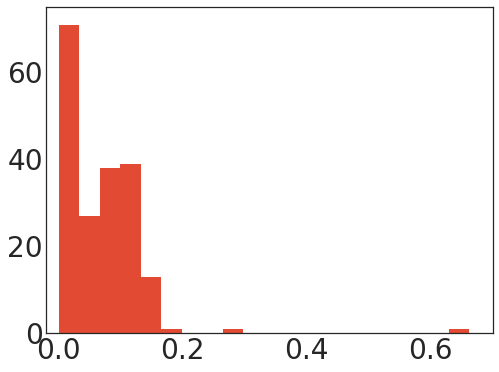

In [10]:
x = np.absolute((l1 - l2))
print("mean:   %.3f"% x.mean())
print("std:    %.3f"% x.std())
print("max:    %.3f"% x.max())
print("min:    %.3f"% x.min())
print("mode:   %.3f"% scipy.stats.mode(x)[0][0])
print("median: %.3f"% np.median(x))
plt.figure(figsize=(8,6))
plt.hist(x, 20)
plt.xlim([-0.02, 0.7])
plt.ylim([0.0, 75.0])
plt.show()

In [11]:
df2 = pd.read_excel(xl1, xl1.sheet_names[8])
cifs = np.array(df2["Framework"])
pld_z = np.array(df2["dc"]).astype(float)
lcd_z = np.array(df2["di"]).astype(float)
print(pld_z.shape)
print(lcd_z.shape)
cifs = list(cifs)

(194,)
(194,)


In [12]:
lcd_iza = sio.loadmat("LCD_data_iza_edt.mat")["data"]
pld_iza = sio.loadmat("PLD_data_iza_edt_ex1.mat")["data"]

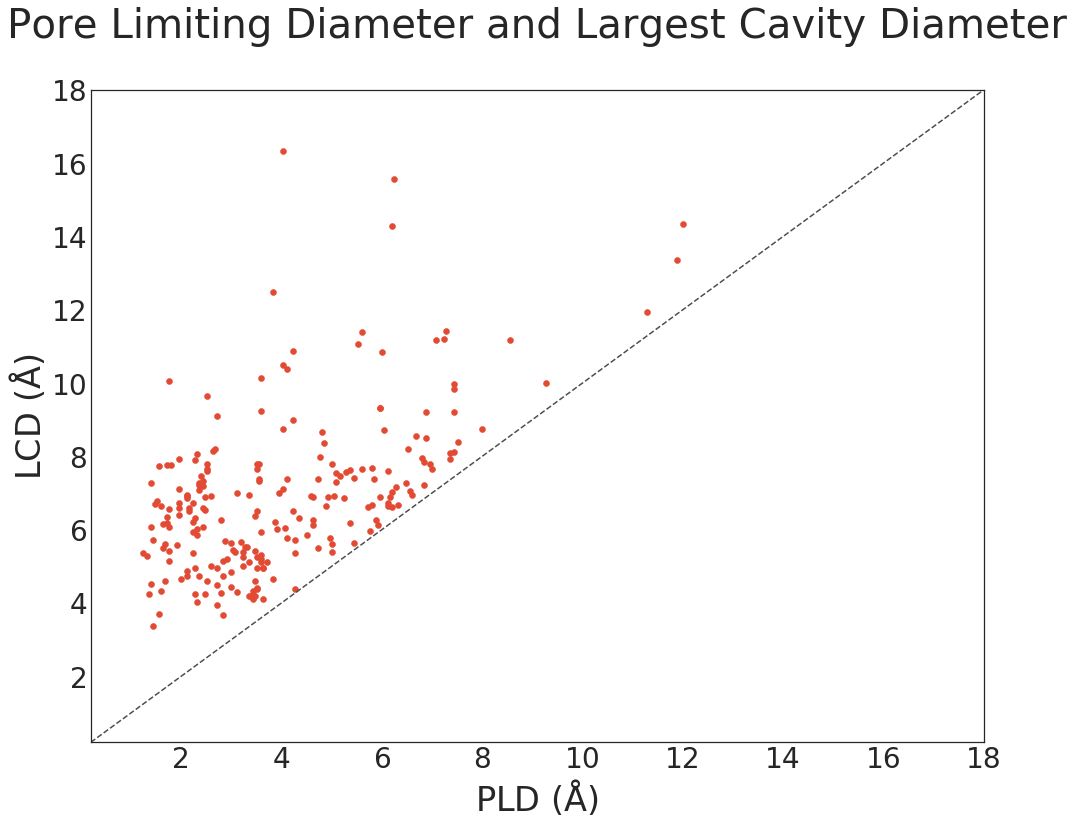

In [13]:
# plt.figure(figsize=(16, 16))
plt.scatter(pld_iza, lcd_iza)
plt.title("Pore Limiting Diameter and Largest Cavity Diameter\n")
plt.ylabel("LCD $(\mathrm{\AA})$")
plt.xlabel("PLD $(\mathrm{\AA})$")
plt.xlim([0.2, 18.0])
plt.ylim([0.2, 18.0])
plt.plot([0.2, 18.0], [0.2, 18.0], ls="--", c=".3")
plt.show()

In [14]:
pld_slabs = sio.loadmat("PLD_data_slab_edt.mat")["data"]
flist_slabs = list(sio.loadmat("PLD_data_slab_edt.mat")["flist"])

In [15]:
print(len(flist_slabs))

6902


In [16]:
pld_arbit = sio.loadmat("PLD_data_arbit_edt.mat")["data"]
flist_arbit = list(sio.loadmat("PLD_data_arbit_edt.mat")["flist"])

In [19]:
print(len(flist_arbit))

3694


In [18]:
%%time
slab_cifs = []
for f in flist:
    slab_cifs.append(f[15:18])

NameError: name 'flist' is not defined

In [20]:
flist_slabs[50:70]

['slab_sample/zz_AEIff-[0,0,1]-f-0.166088_0-c-0.666091_0-ss-45.919322809.cif           ',
 'slab_sample/zz_AEIff-[0,0,1]-f-0.166088_0-c-0.666091_0-ss-9.18399680897.cif          ',
 'slab_sample/zz_AEIff-[0,1,0]-f-0.227991_0-c-0.772216_0-ss-33.9845685169.cif          ',
 'slab_sample/zz_AEIff-[0,1,0]-f-0.227991_0-c-0.772216_0-ss-8.84429717687.cif          ',
 'slab_sample/zz_AEIff-[0,1,1]-f-0.043872_0-c-0.956228_0-ss-32.6496382959.cif          ',
 'slab_sample/zz_AEIff-[0,1,1]-f-0.043881_0-c-0.456208_0-ss-6.7153932222.cif           ',
 'slab_sample/zz_AEIff-[0,1,2]-f-0.0522175_0-c-0.9958935_0-ss-46.0794998158.cif        ',
 'slab_sample/zz_AEIff-[0,1,2]-f-0.0743295_0-c-0.4256635_0-ss-7.41593908321.cif        ',
 'slab_sample/zz_AEIff-[0,2,1]-f-0.0530305_0-c-0.947128_0-ss-36.7656769483.cif         ',
 'slab_sample/zz_AEIff-[0,2,1]-f-0.069927_0-c-0.430218_0-ss-6.25332027.cif             ',
 'slab_sample/zz_AEIff-[1,0,0]-f-0.113946_0-c-0.386197_0-ss-6.75297177165.cif          ',
 'slab_sam

In [21]:
pld_slabs[50:70]

array([[3.86],
       [3.86],
       [3.7 ],
       [4.58],
       [3.76],
       [6.7 ],
       [3.76],
       [6.4 ],
       [3.76],
       [6.82],
       [3.84],
       [3.84],
       [7.  ],
       [3.78],
       [3.78],
       [6.5 ],
       [3.82],
       [3.82],
       [3.96],
       [3.82]])

In [49]:
flist_arbit[25:35]

['arbitCell/zz_AEIff-(0, 0, 1).cif  ',
 'arbitCell/zz_AEIff-(0, 1, 0).cif  ',
 'arbitCell/zz_AEIff-(0, 1, 1).cif  ',
 'arbitCell/zz_AEIff-(0, 1, 2).cif  ',
 'arbitCell/zz_AEIff-(0, 2, 1).cif  ',
 'arbitCell/zz_AEIff-(1, 0, 0).cif  ',
 'arbitCell/zz_AEIff-(1, 0, 1).cif  ',
 'arbitCell/zz_AEIff-(1, 0, 2).cif  ',
 'arbitCell/zz_AEIff-(1, 1, 0).cif  ',
 'arbitCell/zz_AEIff-(1, 1, 1).cif  ']

In [50]:
pld_arbit[25:35]

array([[ 3.78],
       [ 3.74],
       [ 3.76],
       [ 3.76],
       [ 3.76],
       [ 3.78],
       [ 3.82],
       [ 3.78],
       [ 3.84],
       [ 3.82]])

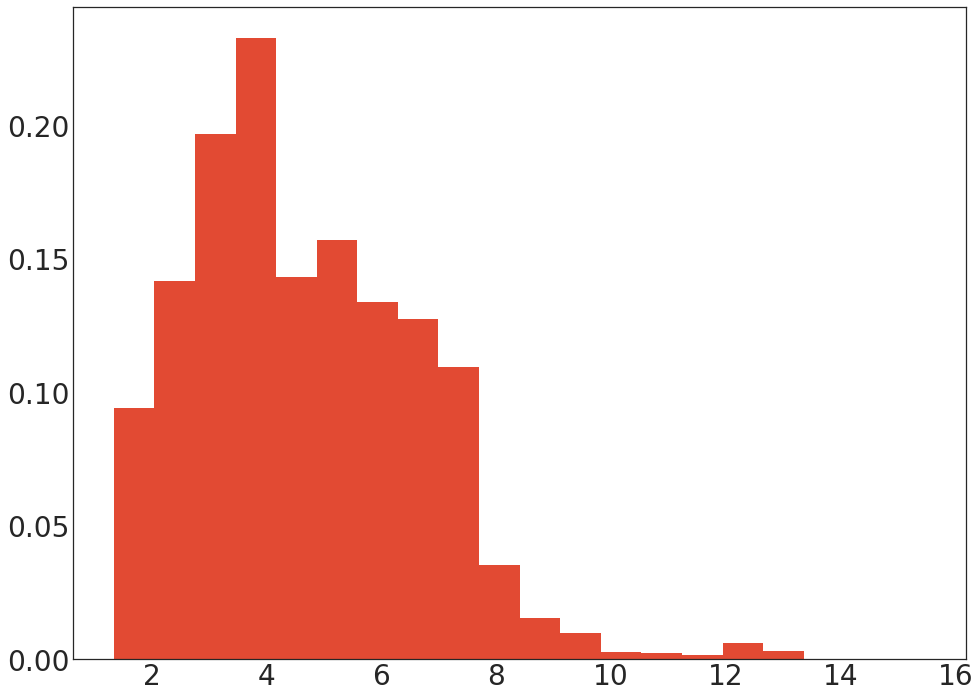

In [29]:
plt.hist(pld_slabs, bins=20, density=True)
plt.show()

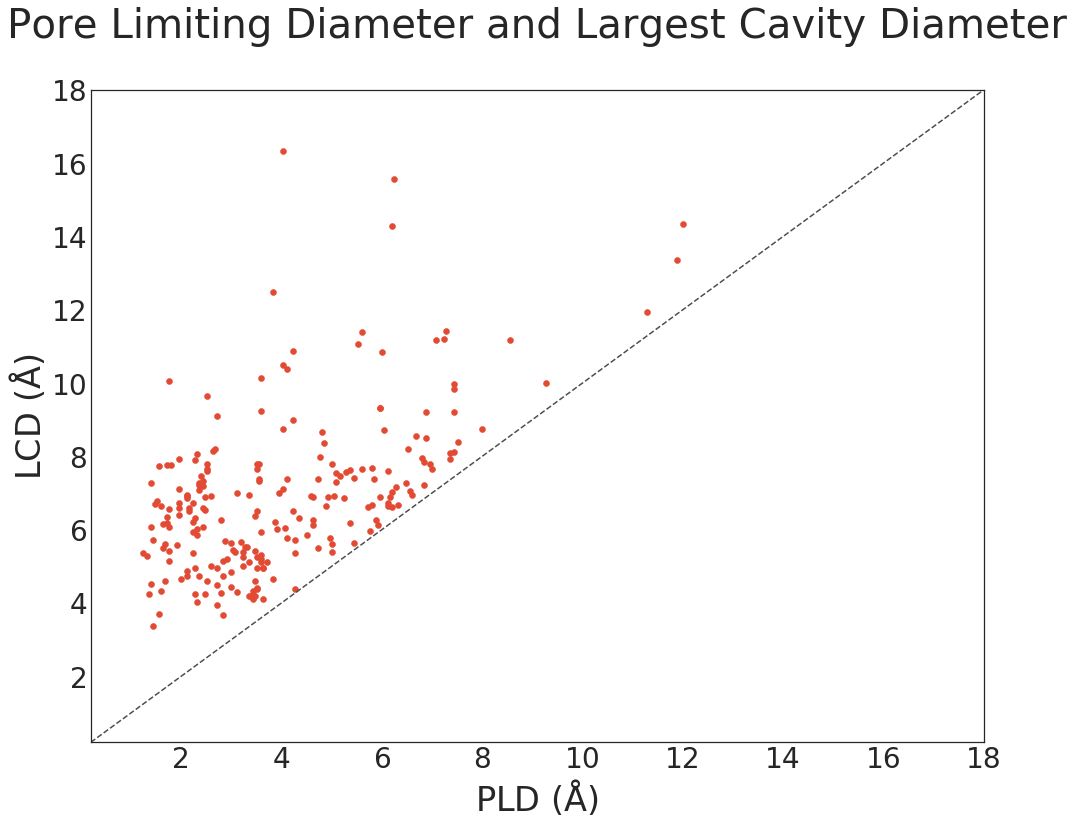

In [22]:
# plt.figure(figsize=(16, 16))
plt.scatter(pld_iza, lcd_iza)
plt.title("Pore Limiting Diameter and Largest Cavity Diameter\n")
plt.ylabel("LCD $(\mathrm{\AA})$")
plt.xlabel("PLD $(\mathrm{\AA})$")
plt.xlim([0.2, 18.0])
plt.ylim([0.2, 18.0])
plt.plot([0.2, 18.0], [0.2, 18.0], ls="--", c=".3")
plt.show()

In [23]:
with open('fnames.txt') as f:
    cifnames = f.readlines()
ciflist = []
for cif in cifnames:
    ciflist.append(cif[-8:-5])

In [24]:
data = np.zeros((pld_z.shape[0], 4))
for i, cif in enumerate(cifs):
    data[i,0] = pld_z[i]
    data[i,2] = lcd_z[i]
    i1 = ciflist.index(cif)
    data[i,1] = pld_iza[i1,0]
    data[i,3] = lcd_iza[i1,0]

SFV  
PAU  
MWF  
LTN  

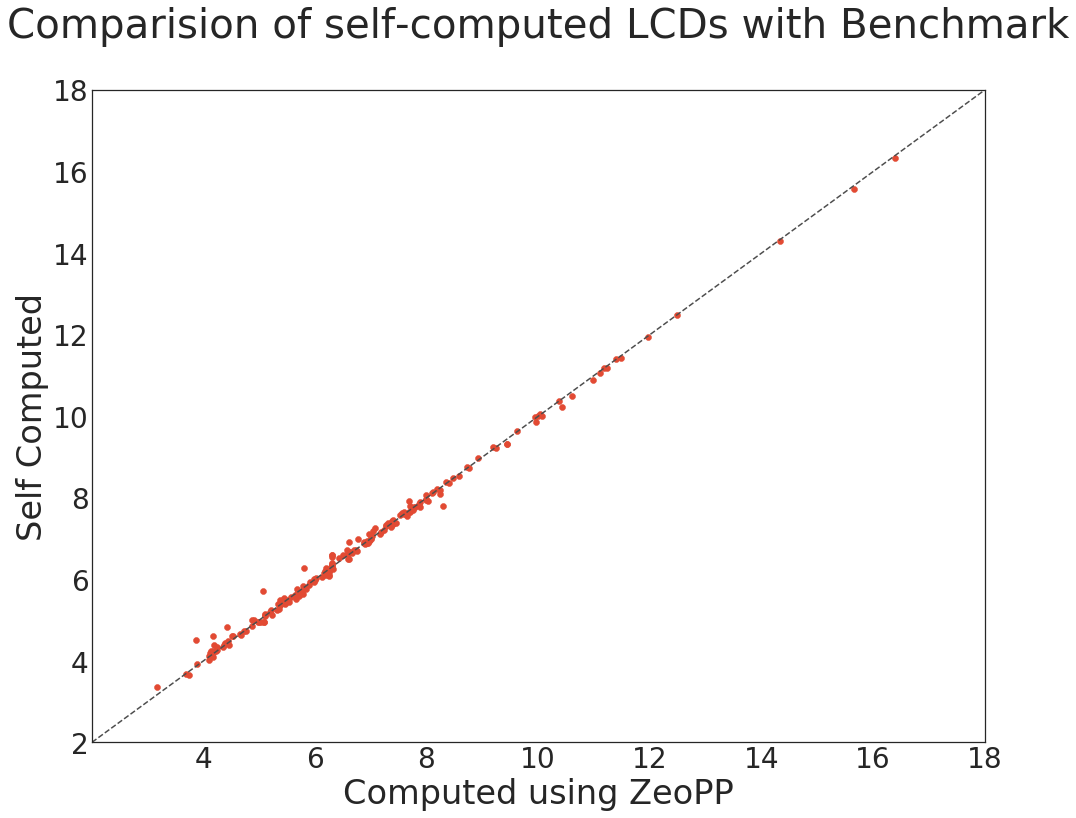

In [26]:
plt.scatter(data[:,2], data[:,3])
plt.title("Comparision of self-computed LCDs with Benchmark\n")
plt.ylabel("Self Computed")
plt.xlabel("Computed using ZeoPP")
plt.xlim([2.01, 18.0])
plt.ylim([2.01, 18.0])
plt.plot([2.01, 18.0], [2.01, 18.0], ls="--", c=".3")
plt.show()

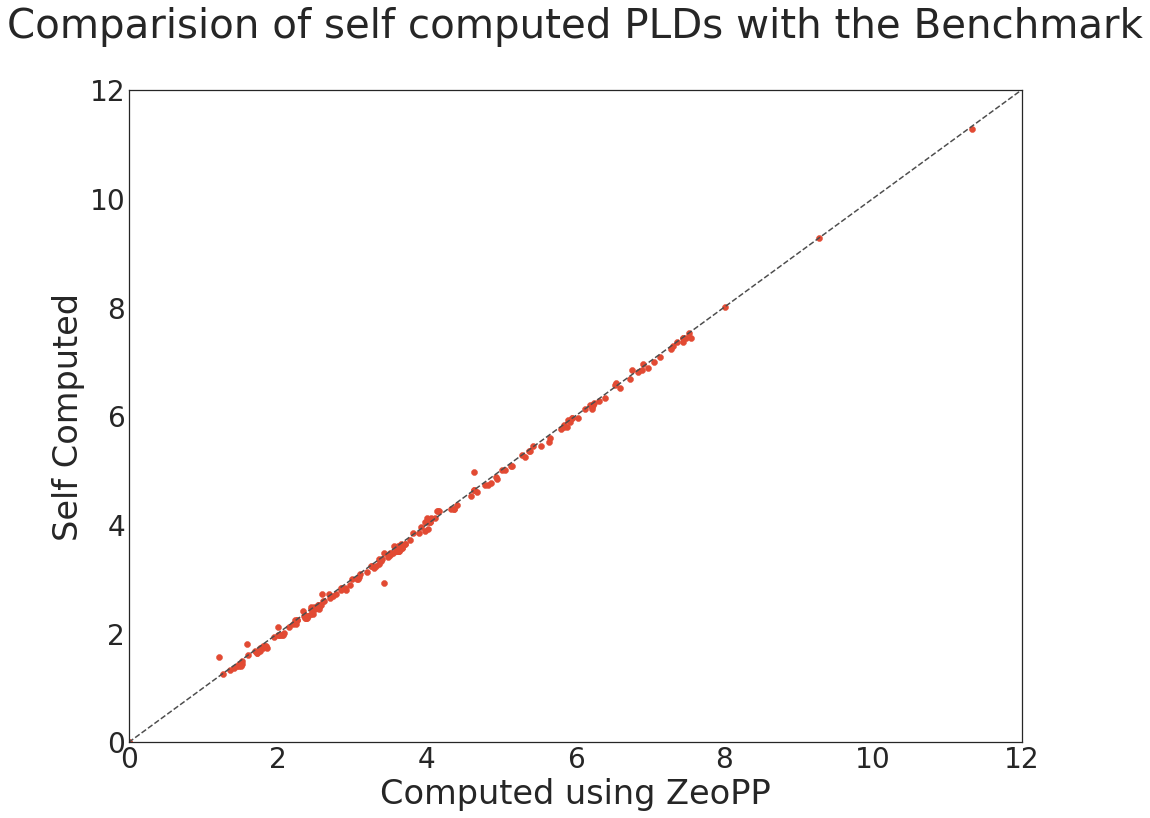

In [27]:
data[131,0] = 0.0
data[98, 0] = 0.0
plt.scatter(data[:,0], data[:,1])
plt.title("Comparision of self computed PLDs with the Benchmark\n")
plt.ylabel("Self Computed")
plt.xlabel("Computed using ZeoPP")
plt.xlim([-0.01, 12.0])
plt.ylim([-0.01, 12.0])
plt.plot([-0.01, 12.0], [-0.01, 12.0], ls="--", c=".3")
plt.show()

mean:   0.058
std:    0.056
max:    0.510
min:    0.000
mode:   0.070
median: 0.050


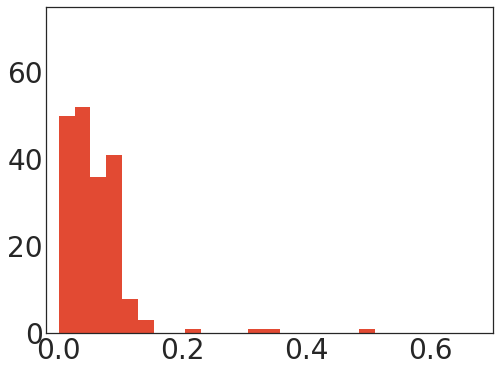

In [28]:
x = np.absolute((data[:,0] - data[:,1]))
print("mean:   %.3f"% x.mean())
print("std:    %.3f"% x.std())
print("max:    %.3f"% x.max())
print("min:    %.3f"% x.min())
print("mode:   %.3f"% scipy.stats.mode(x)[0][0])
print("median: %.3f"% np.median(x))
plt.figure(figsize=(8,6))
plt.hist(x, 20)
plt.xlim([-0.02, 0.7])
plt.ylim([0.0, 75.0])
plt.show()

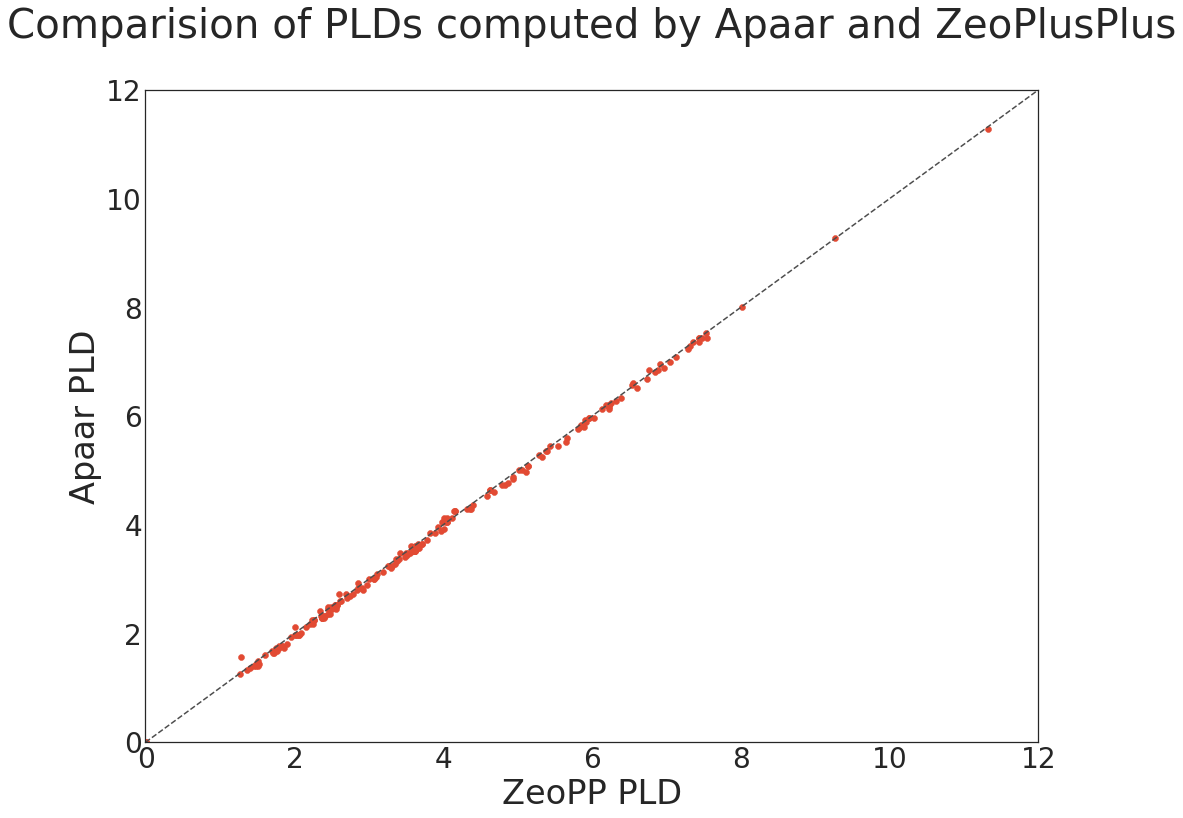

In [29]:
data[8,0] = 2.85
data[57,0] = 1.9
data[117,0] = 1.27
data[136,0] = 5.11
plt.scatter(data[:,0], data[:,1])
plt.title("Comparision of PLDs computed by Apaar and ZeoPlusPlus\n")
plt.ylabel("Apaar PLD")
plt.xlabel("ZeoPP PLD")
plt.xlim([-0.01, 12.0])
plt.ylim([-0.01, 12.0])
plt.plot([-0.01, 12.0], [-0.01, 12.0], ls="--", c=".3")
plt.show()

mean:   0.054
std:    0.038
max:    0.290
min:    0.000
mode:   0.070
median: 0.050


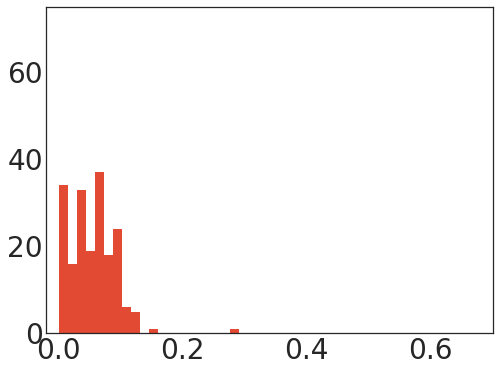

In [30]:
x = np.absolute((data[:,0] - data[:,1]))
print("mean:   %.3f"% x.mean())
print("std:    %.3f"% x.std())
print("max:    %.3f"% x.max())
print("min:    %.3f"% x.min())
print("mode:   %.3f"% scipy.stats.mode(x)[0][0])
print("median: %.3f"% np.median(x))
plt.figure(figsize=(8,6))
plt.hist(x, 20)
plt.xlim([-0.02, 0.7])
plt.ylim([0.0, 75.0])
plt.show()

In [23]:
np.count_nonzero((np.absolute(data[:,0] - data[:,1]) > 0.2) * 1)/ data.shape[0]

0.005154639175257732

In [28]:
np.count_nonzero((np.absolute(data[:,0] - data[:,1]) > 0.3) * 1)/ data.shape[0]

0.0

In [30]:
df2["Framework"].iloc[np.where(np.absolute(data[:,0] - data[:,1]) > 0.1)]

13     AFX
19     AST
38     CAS
42     CGS
104    MER
114    MTN
117    MVY
121    NES
135    RHO
136    RON
150    SBN
152    SBT
185    UTL
188    VNI
Name: Framework, dtype: object

In [40]:
df2["Framework"].iloc[np.where(np.absolute(data[:,0] - data[:,1]) > 0.2)]

8      AFN
57     EON
117    MVY
136    RON
Name: Framework, dtype: object

In [28]:
pore_data = sio.loadmat("Pore_Charecteristics_iza_edt.mat")["data"]

In [29]:
vols = np.prod(pore_data[:,4:] / 10, axis=1)

In [30]:
ac_v = pore_data[:,0]
ad_v = pore_data[:,1]
n_count = pore_data[:, 2]
m_count = pore_data[:, 3]

In [3]:
fig, ax = plt.subplots(tight_layout=True)
plt.hist2d(ac_v, ad_v, bins=(30, 30), norm=colors.LogNorm())
plt.title("Accessible and Admissible Volumes for a 1.2A radius probe \n")
plt.ylabel("Admissible Volume Fraction \n")
plt.xlabel("Accessible Volume Fraction")
plt.xlim([-0.02, 0.50])
plt.ylim([-0.02, 0.50])
plt.plot([-0.02, 0.50], [-0.02, 0.50], ls="--", c=".3")
plt.colorbar()
plt.show()

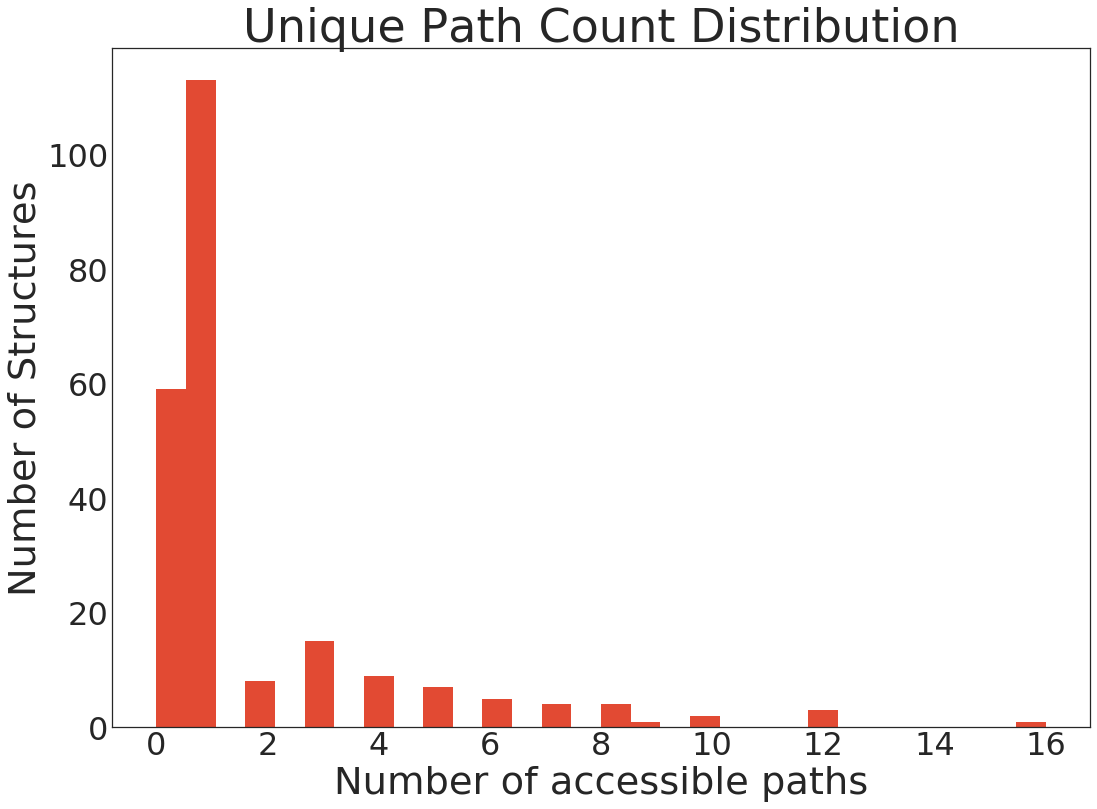

In [53]:
fig, ax = plt.subplots(tight_layout=True)

plt.hist(np.ceil(m_count), 30, density=0, align='mid')
plt.title("Unique Path Count Distribution")
plt.ylabel("Number of Structures")
plt.xlabel("Number of accessible paths")
plt.show()